In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy import special

This code will show estimations of what serrodyne modulation sidebands would look like using similar approaches to finding sidebands in other files.

However, instead of driving a sawtooth, I am looking to see what considering only the first few terms in the Fourier series would do since our EOM has a bandwidth.

In [44]:
#ignoring any desired transitions, looking purely at the modulation of a beam:

#The frequencies we are modulating at are different harmonics:
wm = 1          #normalising with respect to the first harmonic
N = 3          #this is the number of harmonics we wish to use

W = []          #W is a list of all of the frequencies we will be modulating at
for n in range(1,N+1):
    W.append(- wm * n)

ModFirst = 2   #This is the modulation index for the first harmonic
Indices = []    #Following the Fourier series expansion of the sawtooth waveform, the amplitude of the modulation index should be halved each time:
for n in range(1,N+1):
    Indices.append(ModFirst / n)

Order = 10     #Considering up to this order

#What range would we like to plot?
MaxFreq = 10

In [ ]:
#work out the amplitude for each frequency:
values = range(-Order, Order + 1)  # from -Order to Order

Orders = []
NumberOfPlots = 0   #this is the number of sets of indices in Orders
for p in itertools.product(values, repeat = np.size(W)):        #intertools produces all possible combinations of elements
    NumberOfPlots += 1
    Orders.append(p)
    
#Use the same function as before to find the powers at different frequencies
def FreqAndAmp(Orders,ModIndices):

    Freq = 0
    for i in range(0, np.size(Orders)):
        Freq += int(Orders[i] * W[i])

    Amp = 1
    for x in range(np.size(ModIndices)):
        Amp *= special.jv(Orders[x], ModIndices[x])
    return(Freq,Amp)

#find the freqs and amps
UnorderedFrequencies , UnorderedAmps = [] , []
for i in range(0, NumberOfPlots):
    UnorderedFtemp, UnorderedAmptemp = FreqAndAmp(Orders[i],Indices)
    UnorderedFrequencies.append(UnorderedFtemp)
    UnorderedAmps.append(UnorderedAmptemp)

#but this is not finding the total amplitudes at each frequency, rather the amplitudes for each tone modulated at without summing them.

#make a list of all of the frequencies we should be plotting:
Frequencies = np.linspace(-MaxFreq, MaxFreq, 2*MaxFreq +1)

#now find the powers for each of these frequencies
Powers = []
for f in range(0,np.size(Frequencies)):
    mask = UnorderedFrequencies == Frequencies[f]
    A = []
    A.append(np.array(UnorderedAmps)[mask])
    Powers.append(sum(sum(A))**2)       #sum twice since this is a list of arrays
    
mask = Powers == max(Powers)
F = Frequencies[mask]
P = max(Powers)

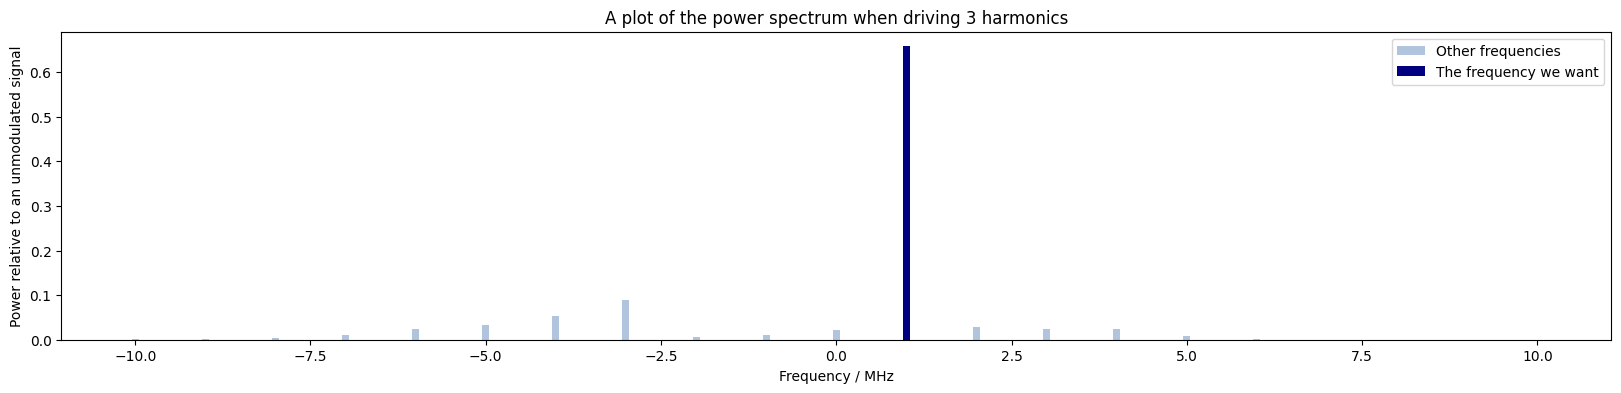

In [49]:
#plot the power spectrum
plt.figure(figsize=(20,4))
plt.bar(Frequencies, Powers,width=0.1, color='lightsteelblue', label = 'Other frequencies')
plt.bar(F, P, width =0.1, color = 'navy', label = 'The frequency we want')

plt.legend()
plt.xlabel('Frequency / MHz')
plt.ylabel('Power relative to an unmodulated signal')
plt.title('A plot of the power spectrum when driving ' + str(N) + ' harmonics')
plt.show()

In [47]:
#ratio of power in 0th order to 1st order:
print('Power in the first harmonic compared to the power before modulation = ' + str(round(P*100,2)) + '%')
print('Ratio of power in the first harmonic over the carrier power = ' + str(round(P/Powers[10],2)))

Power in the first harmonic compared to the power before modulation = 65.78%
Ratio of power in the first harmonic over the carrier power = 31.79
